### Юнит 2. Разведывательный анализ данных
## Итоговое задание

1. Проведите первичную обработку данных. 
Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину 
(в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, 
которые вы будете использовать в дальнейшем построении модели.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import collections
from collections import Counter

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

In [222]:
df = pd.read_csv('stud_math.csv')

In [444]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score', 'Medu_new',
       'Mjob_new', 'Fedu_new', 'Fjob_new', 'reason_new', 'goout_new',
       'absences_new', 'paid_new', 'score_na', 'score_0'],
      dtype='object')

In [6]:
print(f'Train dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'There are {df.isnull().any().sum()} columns in train dataset with missing values.')

Train dataset has 395 rows and 30 columns.
There are 27 columns in train dataset with missing values.


In [7]:
display(df.head(5))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [14]:
df.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

### score

In [ ]:
Есть 6 пустых значений для score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

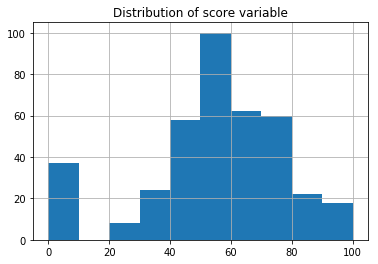

In [11]:
df.score.hist()
plt.title('Distribution of score variable');
df.score.describe()

In [431]:
### Дополнительный столбец, который показывает, доступна ли информация о score
df['score_na'] = df['score'].isna()

In [432]:
pd.DataFrame(df.score_na.value_counts())

,score_na
False,389
True,6


In [20]:
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]

In [21]:
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')

There are 0 columns in train dataset with one unique value.


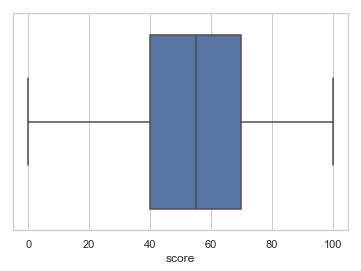

In [20]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['score'])

### school

In [13]:
pd.DataFrame(df.school.value_counts())

,school
GP,349
MS,46


school - нет пропущенных значений

### sex

In [14]:
pd.DataFrame(df.sex.value_counts())

,sex
F,208
M,187


sex - нет пропущенных значений

In [30]:
display(df.groupby(['school','sex'])['age'].mean().round(2).unstack())
display(df.groupby(['school','sex']).size().unstack())

sex,F,M
school,,
GP,16.55,16.44
MS,17.84,18.20


sex,F,M
school,,
GP,179,165
MS,25,20


нет гендерного разделения в школах, в MS ученики старше

### address & famsize

In [52]:
df.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
address    389 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [44]:
pd.DataFrame(df.address.value_counts())

,address
U,295
R,83


In [ ]:
15 нулевых значений

In [33]:
df.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
famsize    362 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [34]:
pd.DataFrame(df.famsize.value_counts())

,famsize
GT3,255
LE3,107


In [ ]:
37 нулевых значений

In [53]:
df.groupby(['famsize','address']).size().unstack()

address,R,U
famsize,,
GT3,58,197
LE3,18,89


In [223]:
df['address'] = df['address'].fillna('U')
# больше записей из города и нет различий от размера семьи, поэтому заполняю пустые значения как город

In [224]:
df['famsize'] = df['famsize'].fillna('GT3')
# нет зависимости размера семьи от типа населённого пункта, проставляю самое популярное значение

### Pstatus

In [178]:
df.loc[:, ['Pstatus']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    350 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [25]:
pd.DataFrame(df.Pstatus.value_counts())

,Pstatus
T,314
A,36


In [56]:
df.groupby(['Pstatus','address']).size().unstack()

address,R,U
Pstatus,,
A,5,31
T,71,237


In [57]:
df.groupby(['Pstatus','famsize']).size().unstack()

famsize,GT3,LE3
Pstatus,,
A,23,13
T,227,81


In [225]:
df['Pstatus'] = df['Pstatus'].fillna('T')
### нет различий от размера семьи и типа нас пункта, поэтому заполняю пустые значения как самое частое значение T

### age

In [60]:
df.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
age    389 non-null int64
dtypes: int64(1)
memory usage: 6.1 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

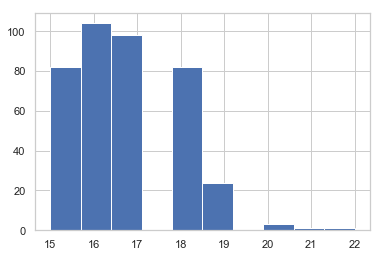

In [22]:
df['age'].hist()
df['age'].describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


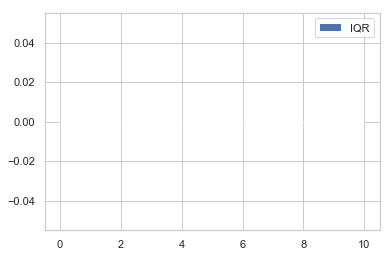

In [33]:
median = df.age.median()
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df.age.loc[df.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
plt.legend();

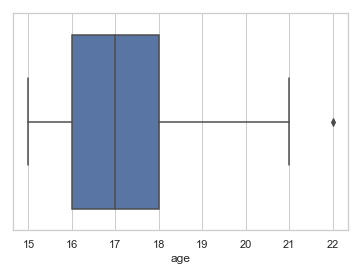

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['age'])

In [64]:
df['age'].value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

In [ ]:
В поле age есть выброс - одно значение 22, мне оно субъективно не кажется выбросом, пока оставлю

In [71]:
df[df['age'] > 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


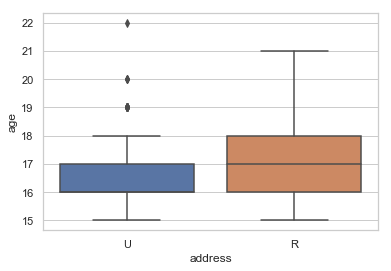

In [69]:
ax = sns.boxplot(x = 'address', y = 'age', data=df)

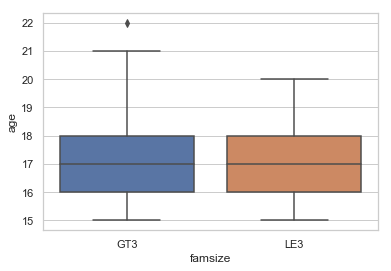

In [34]:
ax = sns.boxplot(x = 'famsize', y = 'age', data=df)

### Medu & Mjob

In [94]:
df.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [93]:
display(df[df['Medu'].isna()].Mjob.value_counts())
print('3 пустых значения Medu, для них заполнено поле Mjob')

other       2
services    1
Name: Mjob, dtype: int64

3 пустых значения Medu, для них заполнено поле Mjob


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

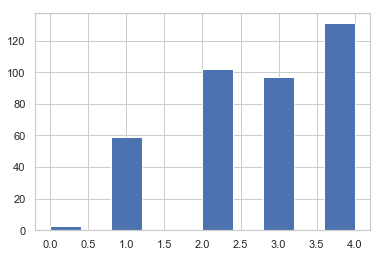

In [60]:
display(df.Medu.value_counts())
df['Medu'].hist()

In [61]:
print('Нахожу, как заполнены поля по профессии для пустых значений в образовании, то есть кем работают матери без данных об образовании')

Нахожу, как заполнены поля по профессии для пустых значений в образовании, то есть кем работают матери без данных об образовании


In [35]:
edu_other = Counter(df['Medu'][df['Mjob'] == 'other']).most_common(1)
edu_services = Counter(df['Medu'][df['Mjob'] == 'services']).most_common(1)

In [36]:
print(edu_other[0][0], edu_services[0][0])

2.0 3.0


In [80]:
other = edu_other[0][0]
services = edu_services[0][0]

In [121]:
def fill_edu(row):
    if pd.isnull(row['Medu']):
        if row['Mjob']  == 'other':
            return edu_other[0][0]        
        if row['Mjob']  == 'services':
            return edu_services[0][0]        
    return row['Medu']


In [226]:
df['Medu_new'] = df.apply(fill_edu, axis = 1)
df[df['Medu_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new


In [135]:
print('Пустые значения Medu заполнены значениями на основании самого частого соотнеошения образования и профессии')

Пустые значения Medu заполнены значениями на основании самого частого соотнеошения образования и профессии


4.0    131
2.0    104
3.0     98
1.0     59
0.0      3
Name: Medu_new, dtype: int64

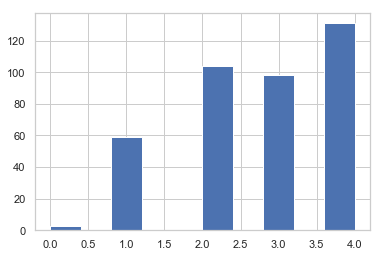

In [124]:
display(df.Medu_new.value_counts())
df['Medu_new'].hist()

In [127]:
df.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


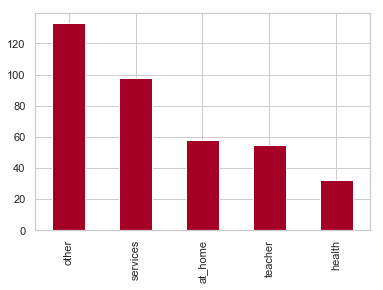

In [159]:
df['Mjob'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'RdYlBu')

In [128]:
display(df[df['Mjob'].isna()].Medu_new.value_counts())
print('19 пустых значения Mjob, для них заполнено поле Medu_new')

4.0    7
3.0    6
2.0    4
1.0    2
Name: Medu_new, dtype: int64

19 пустых значения Mjob, для них заполнено поле Medu_new


In [131]:
job_1 = Counter(df['Mjob'][df['Medu_new'] == 1.0]).most_common(1)
job_2 = Counter(df['Mjob'][df['Medu_new'] == 2.0]).most_common(1)
job_3 = Counter(df['Mjob'][df['Medu_new'] == 3.0]).most_common(1)
job_4 = Counter(df['Mjob'][df['Medu_new'] == 4.0]).most_common(1)

In [133]:
def fill_Mjob(row):
    if pd.isnull(row['Mjob']):
        if row['Medu_new']  == 1.0:
            return job_1[0][0]        
        if row['Medu_new']  == 2.0:
            return job_2[0][0]  
        if row['Medu_new'] == 3.0:
            return job_3[0][0]
        if row['Medu_new'] == 4.0:
            return job_4[0][0]
    return row['Mjob']

In [227]:
df['Mjob_new'] = df.apply(fill_Mjob, axis = 1)
df[df['Mjob_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new


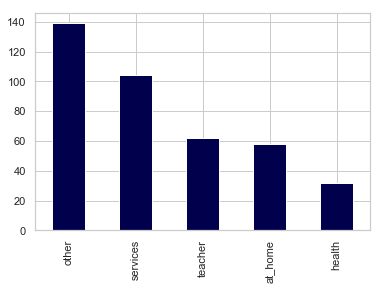

In [155]:
df['Mjob_new'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'seismic')

In [156]:
display(df.groupby(['Medu_new'])['Mjob_new'].value_counts(normalize=True).unstack())

Mjob_new,at_home,health,other,services,teacher
Medu_new,,,,,
0.0,0.666667,NaN,0.333333,NaN,NaN
1.0,0.423729,0.016949,0.474576,0.084746,NaN
2.0,0.201923,0.019231,0.490385,0.288462,NaN
3.0,0.081633,0.051020,0.377551,0.459184,0.030612
4.0,0.015267,0.183206,0.167939,0.183206,0.450382


In [158]:
print('Женщины без образования в большей части не работают квалифицированными работниками, самый высокий уровень образования у учителей')

Женщины без образования в большей части не работают квалифицированными работниками, самый высокий уровень образования у учителей


### Fedu & Fjob

In [160]:
print('Применю аналогичный подход к заполнению образования и работы отцов')

Применю аналогичный подход к заполнению образования и работы отцов


In [161]:
df.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


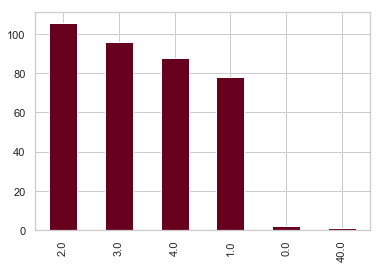

In [173]:
df['Fedu'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'RdBu')

In [182]:
print('Присутствует выброс со значением 40')
df[df['Fedu'] == 40]

Присутствует выброс со значением 40


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,score_av,Medu_new,Mjob_new,Fedu_new
11,GP,F,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0,False,2.0,services,40.0


In [176]:
display(df.groupby(['Fjob'])['Fedu'].value_counts(normalize=True).unstack())

Fedu,0.0,1.0,2.0,3.0,4.0,40.0
Fjob,,,,,,
at_home,NaN,0.214286,0.428571,0.214286,0.142857,NaN
health,NaN,0.076923,0.076923,0.230769,0.615385,NaN
other,0.010526,0.252632,0.305263,0.268421,0.157895,0.005263
services,NaN,0.202128,0.287234,0.329787,0.180851,NaN
teacher,NaN,NaN,NaN,0.038462,0.961538,NaN


In [177]:
print('Для строки с выбросом профессия указана как other, для такой категории профессии нет однозначного уровня образования, поэтому принимаю выброс за ошибку заполнения и заполню его как 4')

Для строки с выбросом профессия указана как other, для такой категории профессии нет однозначного уровня образования, поэтому принимаю выброс за ошибку заполнения и заполню его как 4


In [228]:
df.at[11,'Fedu'] = 4.0

In [229]:
display(df[df['Fedu'].isna()].Fjob.value_counts())
print('24 пустых значения Fedu, для них заполнено поле Fjob')

services    8
other       7
teacher     3
health      2
at_home     2
Name: Fjob, dtype: int64

24 пустых значения Fedu, для них заполнено поле Fjob


In [163]:
edu_other = Counter(df['Fedu'][df['Fjob'] == 'other']).most_common(1)
edu_services = Counter(df['Fedu'][df['Fjob'] == 'services']).most_common(1)
edu_teacher = Counter(df['Fedu'][df['Fjob'] == 'teacher']).most_common(1)
edu_health = Counter(df['Fedu'][df['Fjob'] == 'health']).most_common(1)
edu_at_home = Counter(df['Fedu'][df['Fjob'] == 'at_home']).most_common(1)

In [166]:
def fill_Fedu(row):
    if pd.isnull(row['Fedu']):
        if row['Fjob']  == 'other':
            return edu_other[0][0]        
        if row['Fjob']  == 'services':
            return edu_services[0][0]      
        if row['Fjob']  == 'teacher':
            return edu_teacher[0][0] 
        if row['Fjob']  == 'health':
            return edu_health[0][0] 
        if row['Fjob']  == 'at_home':
            return edu_at_home[0][0] 
    return row['Fedu']

In [230]:
df['Fedu_new'] = df.apply(fill_Fedu, axis = 1)
df[df['Fedu_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0,3.0,other,NaN
374,MS,F,18,R,LE3,T,4.0,NaN,other,NaN,reputation,mother,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,95.0,4.0,other,NaN


In [170]:
display(df.groupby(['Medu'])['Fedu'].value_counts(normalize=True).unstack())

Fedu,0.0,1.0,2.0,3.0,4.0,40.0
Medu,,,,,,
0.0,NaN,0.333333,0.666667,NaN,NaN,NaN
1.0,0.017857,0.642857,0.232143,0.089286,0.017857,NaN
2.0,NaN,0.275510,0.479592,0.173469,0.061224,0.010204
3.0,NaN,0.144444,0.277778,0.377778,0.200000,NaN
4.0,0.008264,NaN,0.148760,0.322314,0.520661,NaN


In [191]:
print('Для двух значений не проставилось значение Fedu. Для них заполню это поле таким же значением, как у матерей, так как в большей части уровни образований совпадают')

Для двух значений не проставилось значение Fedu. Для них заполню это поле таким же значением, как у матерей, так как в большей части уровни образований совпадают


In [231]:
df.at[161,'Fedu_new'] = 3.0
df.at[374,'Fedu_new'] = 4.0

In [232]:
df[df['Fedu_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new


In [197]:
df.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


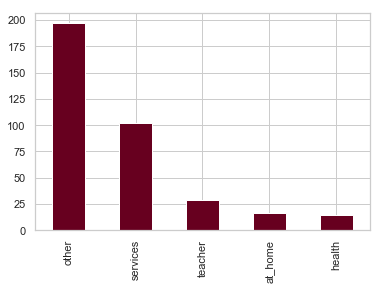

In [200]:
df['Fjob'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'RdGy')

In [198]:
display(df[df['Fjob'].isna()].Fedu_new.value_counts())
print('36 пустых значения Fjob, для них заполнено поле Fedu_new')

2.0    14
3.0     8
1.0     7
4.0     7
Name: Fedu_new, dtype: int64

36 пустых значения Fjob, для них заполнено поле Fedu_new


In [201]:
job_1 = Counter(df['Fjob'][df['Fedu_new'] == 1.0]).most_common(1)
job_2 = Counter(df['Fjob'][df['Fedu_new'] == 2.0]).most_common(1)
job_3 = Counter(df['Fjob'][df['Fedu_new'] == 3.0]).most_common(1)
job_4 = Counter(df['Fjob'][df['Fedu_new'] == 4.0]).most_common(1)

In [202]:
def fill_Fjob(row):
    if pd.isnull(row['Fjob']):
        if row['Fedu_new']  == 1.0:
            return job_1[0][0]        
        if row['Fedu_new']  == 2.0:
            return job_2[0][0]  
        if row['Fedu_new'] == 3.0:
            return job_3[0][0]
        if row['Fedu_new'] == 4.0:
            return job_4[0][0]
    return row['Fjob']

In [233]:
df['Fjob_new'] = df.apply(fill_Fjob, axis = 1)
df[df['Fjob_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new


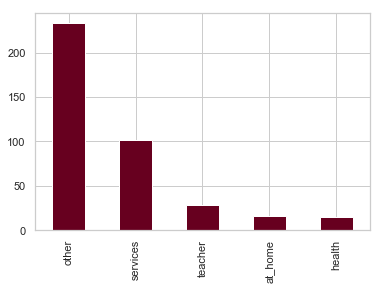

In [204]:
df['Fjob_new'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'RdGy')

In [205]:
df['Fjob_new'].value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob_new, dtype: int64

In [206]:
df['Fjob'].value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [207]:
print('Стало больше other, и так как это самая популярная категория, то примерно того же распределения можно было допиться заполнив other просто по всем пропускам')

Стало больше other, и так как это самая популярная категория, то примерно того же распределения можно было допиться заполнив other просто по всем пропускам


In [73]:
display(df.groupby(['Fedu'])['Fjob'].value_counts(normalize=True).unstack())

Fjob,at_home,health,other,services,teacher
Fedu,,,,,
0.0,NaN,NaN,1.000000,NaN,NaN
1.0,0.044118,0.014706,0.676471,0.264706,NaN
2.0,0.065934,0.010989,0.637363,0.285714,NaN
3.0,0.034483,0.034483,0.574713,0.344828,0.011494
4.0,0.024390,0.097561,0.365854,0.207317,0.304878
40.0,NaN,NaN,1.000000,NaN,NaN


### Reason

In [51]:
pd.DataFrame(df.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


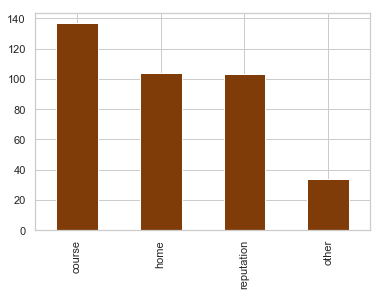

In [209]:
df['reason'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'PuOr')

In [235]:
df.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [56]:
df.groupby(['school','reason']).size()

school  reason    
GP      course        119
        home           94
        other          25
        reputation     98
MS      course         18
        home           10
        other           9
        reputation      5
dtype: int64

In [211]:
df.groupby(['reason','traveltime']).size()

reason      traveltime
course      1.0           77
            2.0           32
            3.0           11
            4.0            5
home        1.0           69
            2.0           24
            3.0            3
            4.0            2
other       1.0           21
            2.0            8
            3.0            3
reputation  1.0           62
            2.0           30
            3.0            5
dtype: int64

In [234]:
display(df[df['reason'].isna()].traveltime.value_counts())
print('17 пустых значения Fjob, для них заполнено поле traveltime')

1.0    13
2.0     2
Name: traveltime, dtype: int64

17 пустых значения Fjob, для них заполнено поле traveltime


In [216]:
print('Для 70% студентов с traveltime = 1 поле reason заполнено как home, по этой причине заполню для таких пустых reason = home, оставшимся course, как самое частое значение')

Для 70% студентов с traveltime = 1 поле reason заполнено как home, по этой причине заполню для таких пустых reason = home, оставшимся course, как самое частое значение


In [236]:
def fill_reason(row):
    if pd.isnull(row['reason']):
        if row['traveltime']  == 1.0:
            return 'home'        
        if row['traveltime']  == 2.0:
            return 'course'        
    return row['reason']

In [237]:
df['reason_new'] = df.apply(fill_reason, axis = 1)
df[df['reason_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new
112,GP,F,16,U,GT3,T,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0,2.0,at_home,2.0,other,NaN
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0,3.0,other,2.0,other,NaN


In [239]:
df.at[112,'reason_new'] = 'course'
df.at[137,'reason_new'] = 'course'
df[df['reason_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new


### traveltime

In [240]:
df.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


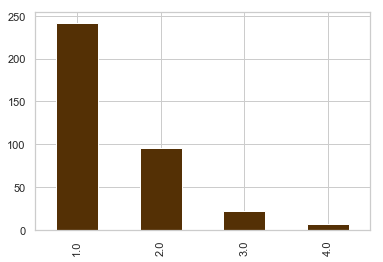

In [241]:
df['traveltime'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'BrBG')

In [242]:
df['traveltime'].describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [243]:
df['traveltime'].value_counts(normalize = True)

1.0    0.659401
2.0    0.261580
3.0    0.059946
4.0    0.019074
Name: traveltime, dtype: float64

In [ ]:
print('Самое частое значение, и медиана = 1, по этой причине заполню пропуски значением 1')

In [244]:
df['traveltime'] = df['traveltime'].fillna(1.0)

In [245]:
df.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


### studytime

In [246]:
df.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [250]:
display(df[df['studytime'].isna()].traveltime.value_counts())
print('Всего 7 пропущенных значений')

1.0    6
3.0    1
Name: traveltime, dtype: int64

Всего 7 пропущенных значений


In [60]:
df['studytime'].describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [64]:
df['studytime'].value_counts(normalize = True)

2.0    0.500000
1.0    0.265464
3.0    0.164948
4.0    0.069588
Name: studytime, dtype: float64

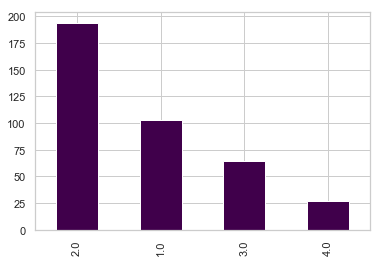

In [249]:
df['studytime'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'PRGn')

In [252]:
display(df.groupby(['traveltime'])['studytime'].value_counts(normalize=True).unstack())

studytime,1.0,2.0,3.0,4.0
traveltime,,,,
1.0,0.238636,0.511364,0.181818,0.068182
2.0,0.281250,0.489583,0.145833,0.083333
3.0,0.476190,0.476190,0.047619,NaN
4.0,0.428571,0.285714,0.142857,0.142857


In [ ]:
print('Самое частое значение, и медиана = 2, по этой причине заполню пропуски значением 2')

In [253]:
df['studytime'] = df['studytime'].fillna(2.0)

In [254]:
df.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


### failures

In [255]:
df.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [256]:
df['failures'].describe()

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [257]:
df['failures'].value_counts(normalize = True)

0.0    0.785523
1.0    0.131367
2.0    0.042895
3.0    0.040214
Name: failures, dtype: float64

In [258]:
print('Принимаю, что пропуски - это отутствие неудач и заполняю значением 0')

Принимаю, что пропуски - это отутствие неудач и заполняю значением 0


In [259]:
df['failures'] = df['failures'].fillna(0.0)

In [260]:
df.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


### schoolsup

In [261]:
df['schoolsup'].value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [264]:
print('Принимаю, что пропуски - это отутствие поддержки и заполняю значением no')

Принимаю, что пропуски - это отутствие поддержки и заполняю значением no


In [265]:
df['schoolsup'] = df['schoolsup'].fillna('no')

### famsup

In [297]:
df['famsup'].value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

In [268]:
df.groupby(['schoolsup','famsup']).size().unstack()

famsup,no,yes
schoolsup,,
no,126,187
yes,11,32


In [269]:
display(df[df['famsup'].isna()].schoolsup.value_counts())

no     31
yes     8
Name: schoolsup, dtype: int64

In [281]:
display(df[df['famsup'].isna()].guardian.value_counts())

mother    29
father     8
other      2
Name: guardian, dtype: int64

In [283]:
display(df.groupby(['guardian'])['famsup'].value_counts(normalize=True, dropna = False).unstack())

famsup,nan,no,yes
guardian,,,
father,0.093023,0.337209,0.569767
mother,0.103203,0.345196,0.551601
other,0.071429,0.392857,0.535714


In [442]:
df['famsup'] = df['famsup'].fillna('yes')
df['famsup'].value_counts(dropna=False)

yes    258
no     137
Name: famsup, dtype: int64

### guardian

In [271]:
df['guardian'].value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

In [275]:
display(df[df['guardian'].isna()].Pstatus.value_counts())

T    30
A     1
Name: Pstatus, dtype: int64

In [276]:
df.groupby(['guardian','Pstatus']).size().unstack()

Pstatus,A,T
guardian,,
father,4,82
mother,27,223
other,4,24


In [278]:
display(df.groupby(['Pstatus'])['guardian'].value_counts(normalize=True).unstack())

guardian,father,mother,other
Pstatus,,,
A,0.114286,0.771429,0.114286
T,0.249240,0.677812,0.072948


In [279]:
print('Вне зависимости от статуса совместного жилья родителей, мама в большей части является опекуном, так как же по пропущенным значениям с опекуном, у 31 из 30 учащихся родители живут вместе. Поэтому заполняю пропуски как mother')

Вне зависимости от статуса совместного жилья родителей, мама в большей части является опекуном, так как же по пропущенным значениям с опекуном, у 31 из 30 учащихся родители живут вместе. Поэтому заполняю пропуски как mother


In [280]:
df['guardian'] = df['guardian'].fillna('mother')

### paid

In [284]:
df['paid'].value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

In [286]:
display(df[df['paid'].isna()].activities.value_counts())

yes    22
no     17
Name: activities, dtype: int64

In [404]:
display(df[df['paid'].isna()].famsup.value_counts())

yes    25
no     11
Name: famsup, dtype: int64

In [405]:
display(df.groupby(['famsup'])['paid'].value_counts(normalize=True).unstack())

paid,no,yes
famsup,,
no,0.746032,0.253968
yes,0.427835,0.572165


In [406]:
print('Буду заполнять поле исходя из значений famsup')

Буду заполнять поле исходя из значений famsup


In [408]:
def fill_paid(row):
    if pd.isnull(row['paid']):
        if row['famsup']  == 'no':
            return 'no'        
        if row['famsup']  == 'yes':
            return 'yes'       
    return row['paid']

df['paid_new'] = df.apply(fill_paid, axis = 1)
df[df['paid_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new,goout_new,absences_new,paid_new
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0,4.0,health,2.0,other,other,3.0,2,NaN
246,GP,M,17,U,GT3,T,2.0,3.0,other,other,course,father,2.0,1.0,0.0,no,NaN,NaN,no,yes,-3.0,yes,yes,no,5.0,2.0,2.0,2.0,4.0,65.0,2.0,other,3.0,other,course,2.0,3,NaN
279,GP,M,18,U,LE3,T,4.0,3.0,teacher,services,course,mother,2.0,1.0,0.0,no,NaN,NaN,yes,yes,-3.0,yes,yes,no,4.0,2.0,3.0,1.0,8.0,50.0,4.0,teacher,3.0,services,course,3.0,4,NaN
313,GP,F,19,U,GT3,T,3.0,2.0,services,other,reputation,other,2.0,2.0,0.0,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0,3.0,services,2.0,other,reputation,2.0,6,NaN


In [410]:
df['paid_new'].value_counts(dropna=False)

no     211
yes    180
NaN      4
Name: paid_new, dtype: int64

In [412]:
df['paid_new'] = df['paid_new'].fillna('no')
df[df['paid_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new,goout_new,absences_new,paid_new


### activities

In [76]:
df['activities'].value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

In [417]:
display(df[df['activities'].isna()].freetime.value_counts())

3.0    10
4.0     3
2.0     1
Name: freetime, dtype: int64

In [418]:
display(df.groupby(['freetime'])['activities'].value_counts(normalize=True).unstack())

activities,no,yes
freetime,,
1.0,0.666667,0.333333
2.0,0.500000,0.500000
3.0,0.480519,0.519481
4.0,0.495413,0.504587
5.0,0.394737,0.605263


In [422]:
print('Заполню значением no ')

Заполню занчением no 


In [443]:
df['activities'] = df['activities'].fillna('no')
df['activities'].value_counts(dropna=False)

no     200
yes    195
Name: activities, dtype: int64

### nursery

In [77]:
df['nursery'].value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

In [299]:
display(df[df['activities'].isna()].address.value_counts())

U    12
R     2
Name: address, dtype: int64

In [300]:
display(df.groupby(['address'])['nursery'].value_counts(normalize=True).unstack())

nursery,no,yes
address,,
R,0.243590,0.756410
U,0.199336,0.800664


In [302]:
print('Студенты с пропущенным значением nursery - городские жители, для них 80% учащихся посещали дествик сад. Заполняю пропуски значением yes ')

Студенты с пропущенным значением nursery - городские жители, для них 80% учащихся посещали дествик сад. Заполняю пропуски значением yes 


In [303]:
df['nursery'] = df['nursery'].fillna('yes')

### higher

In [78]:
df['higher'].value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

In [314]:
display(df[df['higher'].isna()].address.value_counts())

U    17
R     3
Name: address, dtype: int64

In [315]:
display(df.groupby(['address'])['higher'].value_counts(normalize=True).unstack())

higher,no,yes
address,,
R,0.075000,0.925000
U,0.044068,0.955932


In [316]:
print('Студенты с пропущенным значением higher - городские жители, среди которых 93% хотят поллучать высшее образование. Заполню пропуски значением yes')

Студенты с пропущенным значением higher - городские жители, среди которых 93% хотят поллучать высшее образование. Заполню пропуски значением yes


In [322]:
df['higher'] = df['higher'].fillna('yes')
df['higher'].value_counts(dropna=False)

yes    376
no      19
Name: higher, dtype: int64

### internet

In [79]:
df['internet'].value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

In [320]:
display(df[df['internet'].isna()].address.value_counts())

U    28
R     6
Name: address, dtype: int64

In [319]:
display(df.groupby(['address'])['internet'].value_counts(normalize=True).unstack())

internet,no,yes
address,,
R,0.298701,0.701299
U,0.116197,0.883803


In [321]:
print('Студенты с пропущенным значением internet - городские жители, среди которых 88% имеют интернет дома. Заполню пропуски значением yes')

Студенты с пропущенным значением internet - городские жители, среди которых 88% имеют интернет дома. Заполню пропуски значением yes


In [323]:
df['internet'] = df['internet'].fillna('yes')
df['internet'].value_counts(dropna=False)

yes    339
no      56
Name: internet, dtype: int64

### romantic

In [80]:
df['romantic'].value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

In [328]:
display(df[df['romantic'].isna()].address.value_counts())

U    25
R     6
Name: address, dtype: int64

In [329]:
display(df.groupby(['address'])['romantic'].value_counts(normalize=True).unstack())

romantic,no,yes
address,,
R,0.649351,0.350649
U,0.662021,0.337979


In [424]:
print('Предполагаю, что на этот вопрос студенты могли смущаться отвечать, если нет романтических отношений. Заполняю как no')

Предполагаю, что на этот вопрос студенты могли смущаться отвечать, если нет романтических отношений. Заполняю как no


In [425]:
df['romantic'] = df['romantic'].fillna('no')
df['romantic'].value_counts(dropna=False)

no     271
yes    124
Name: romantic, dtype: int64

### famrel

In [82]:
df['famrel'].value_counts(dropna=False).sort_values()

-1.0      1
 1.0      7
 2.0     17
NaN      27
 3.0     62
 5.0     99
 4.0    182
Name: famrel, dtype: int64

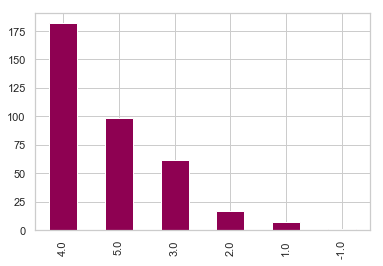

In [330]:
df['famrel'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'PiYG')

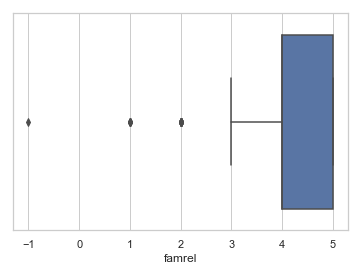

In [331]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['famrel'])

In [ ]:
print('Значение -1 - выброс, заполню его значением 1')

In [332]:
df[df['famrel'] == -1 ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0,2.0,services,2.0,services,home


In [333]:
df.at[25,'famrel'] = 1

In [335]:
display(df[df['famrel'].isna()].guardian.value_counts())

mother    19
father     7
other      1
Name: guardian, dtype: int64

In [336]:
print('Семейные отношения - вопрос, на который могли не ответить в связи с тем, что они очень плохие. Принимаю этот вариант и заполню пустые значение как 2')

Семейные отношения - вопрос, на который могли не ответить в связи с тем, что они очень плохие. Принимаю этот вариант и заполню пустые значение как 2


In [337]:
df['famrel'] = df['famrel'].fillna(2.0)
df['famrel'].value_counts(dropna=False)

4.0    182
5.0     99
3.0     62
2.0     44
1.0      8
Name: famrel, dtype: int64

### freetime

In [84]:
df['freetime'].value_counts(dropna=False).sort_values(ascending=False)

 3.0    153
 4.0    112
 2.0     63
 5.0     38
 1.0     18
NaN      11
Name: freetime, dtype: int64

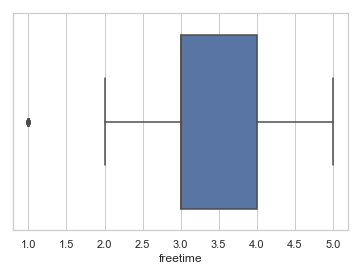

In [338]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['freetime'])

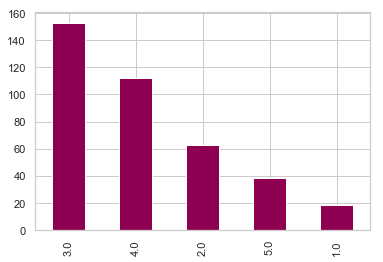

In [339]:
df['freetime'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'PiYG')

In [342]:
display(df[df['freetime'].isna()].traveltime.value_counts())

1.0    7
2.0    2
3.0    2
Name: traveltime, dtype: int64

In [346]:
print('Не нашла явной зависимости от других переменных, заполню как самое популярное значение 3')

Не нашла явной зависимости от других переменных, заполню как самое популярное значение 3


In [347]:
df['freetime'] = df['freetime'].fillna(3.0)
df['freetime'].value_counts(dropna=False)

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

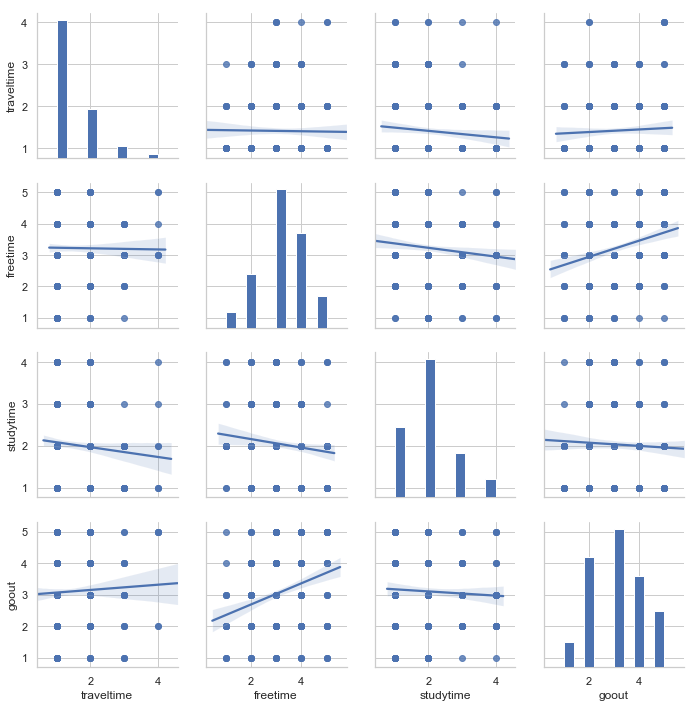

In [348]:
sns.pairplot(df, vars=['traveltime', 'freetime', 'studytime', 'goout'], kind = 'reg')

### goout

In [85]:
df['goout'].value_counts(dropna=False).sort_values(ascending=False)

 3.0    127
 2.0    101
 4.0     84
 5.0     52
 1.0     23
NaN       8
Name: goout, dtype: int64

In [349]:
display(df[df['goout'].isna()].freetime.value_counts())

3.0    5
5.0    1
4.0    1
1.0    1
Name: freetime, dtype: int64

In [350]:
display(df.groupby(['goout','freetime']).size().unstack())

freetime,1.0,2.0,3.0,4.0,5.0
goout,,,,,
1.0,4,5,6,4,4
2.0,7,26,43,18,7
3.0,4,17,69,33,4
4.0,1,11,27,39,6
5.0,1,4,14,17,16


In [351]:
print('Есть зависимость значений goout и freetime, заполню пустые значения исходя из диагонали заполнения')

Есть зависимость значений goout и freetime, заполню пустые значения исходя из диагонали заполнения


In [352]:
def fill_goout(row):
    if pd.isnull(row['goout']):
        if row['freetime']  == 1.0:
            return 1.0        
        if row['freetime']  == 2.0:
            return 2.0  
        if row['freetime']  == 3.0:
            return 3.0
        if row['freetime']  == 4.0:
            return 4.0
        if row['freetime']  == 5.0:
            return 5.0
    return row['goout']

df['goout_new'] = df.apply(fill_goout, axis = 1)
df[df['goout_new'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new,goout_new


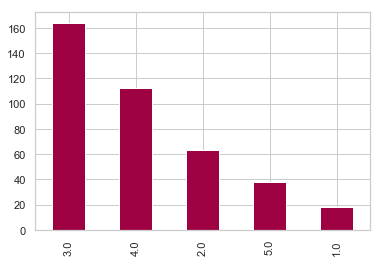

In [353]:
df['freetime'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'Spectral')

### health

In [357]:
df['health'].value_counts(dropna=False).sort_values(ascending=False)

 5.0    138
 3.0     89
 4.0     63
 1.0     47
 2.0     43
NaN      15
Name: health, dtype: int64

In [354]:
df['health'].describe()

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

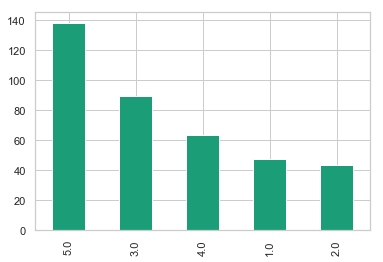

In [355]:
df['health'].value_counts().plot(kind = 'bar', 
                              grid = True,
                              colormap = 'Dark2')

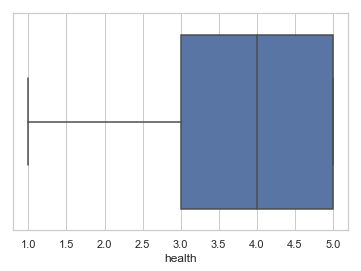

In [356]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['health'])

In [361]:
display(df[df['health'].isna()].freetime.value_counts())

4.0    6
3.0    4
2.0    2
5.0    2
1.0    1
Name: freetime, dtype: int64

In [360]:
print('Здоровье - вопрос, на который могли не ответить в связи с тем, что оно плохое, вопрос имеет негативный окрас. Принимаю этот вариант и заполню пустые значение как 2')

Здоровье - вопрос, на который могли не ответить в связи с тем, что оно плохое, вопрос имеет негативный окрас. Принимаю этот вариант и заполню пустые значение как 2


In [362]:
df['health'] = df['health'].fillna(2.0)
df['health'].value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
2.0     58
1.0     47
Name: health, dtype: int64

### absences

In [363]:
df['absences'].describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [365]:
df['absences'].value_counts(dropna=False).sort_values()

 28.0       1
 25.0       1
 54.0       1
 385.0      1
 26.0       1
 56.0       1
 24.0       1
 212.0      1
 75.0       1
 30.0       1
 19.0       1
 38.0       1
 40.0       1
 23.0       1
 21.0       1
 17.0       1
 15.0       2
 11.0       2
 13.0       2
 22.0       3
 1.0        3
 9.0        3
 20.0       4
 18.0       5
 5.0        5
 7.0        6
 16.0       7
 3.0        8
 12.0      12
 14.0      12
NaN        12
 10.0      17
 8.0       21
 6.0       31
 4.0       53
 2.0       60
 0.0      111
Name: absences, dtype: int64

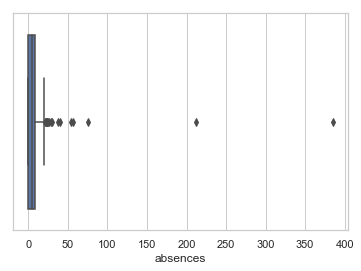

In [366]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df['absences'])

In [369]:
print('Выбросы - значения 212 и 385, заполню их 0')

Выбросы - значения 212 и 385, заполню их 0


In [374]:
df[(df['absences'] == 212) | (df['absences'] == 385)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_new,Mjob_new,Fedu_new,Fjob_new,reason_new,goout_new
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0,2.0,services,3.0,teacher,other,1.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0,2.0,services,2.0,services,course,4.0


In [375]:
df.at[222,'absences'] = 0
df.at[390,'absences'] = 0

In [378]:
print('50 квартиль - 4, заполню им пустые значения')

50 квартиль - 4, заполню им пустые значения


In [379]:
df['absences'] = df['absences'].fillna(4.0)

In [ ]:
print('Сделаю группировку по дням для поля absences')

In [399]:
df['absences_new'] = pd.cut(df['absences'], bins = [0, 0.9, 3, 5, 10, 20, 30, 40, 50, 100], 
                            labels = [1,2,3,4,5,6,7,8,9],
                            include_lowest = True)

In [400]:
df['absences_new'].value_counts(dropna=False).sort_values()

8      0
7      2
9      3
6     10
5     48
3     70
2     71
4     78
1    113
Name: absences_new, dtype: int64

### studytime, granular

In [445]:
df['studytime, granular'].value_counts(normalize=True)

-6.0     0.500000
-3.0     0.265464
-9.0     0.164948
-12.0    0.069588
Name: studytime, granular, dtype: float64

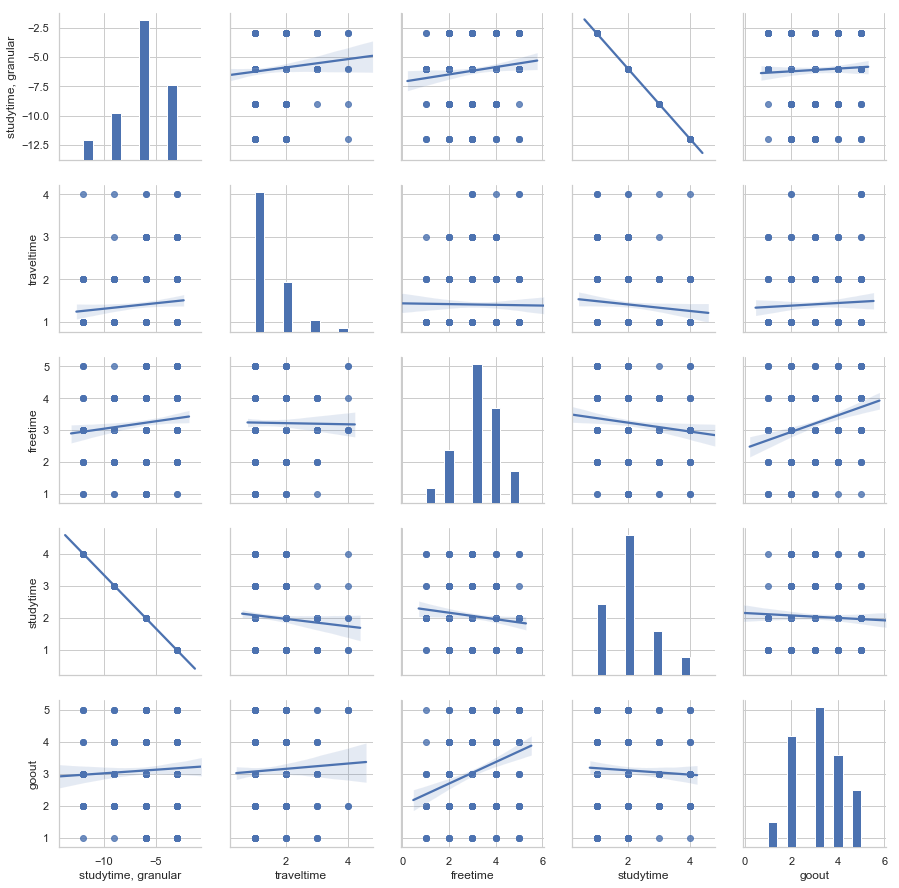

In [446]:
sns.pairplot(df, vars=['studytime, granular','traveltime', 'freetime', 'studytime', 'goout'], kind = 'reg')

In [447]:
display(df.groupby(['studytime, granular','studytime']).size().unstack())

studytime,1.0,2.0,3.0,4.0
"studytime, granular",,,,
-12.0,NaN,NaN,NaN,27.0
-9.0,NaN,NaN,64.0,NaN
-6.0,NaN,194.0,NaN,NaN
-3.0,103.0,NaN,NaN,NaN


In [448]:
print('Поле studytime, granular прямо коррелирует с полем studytime и является избыточным, удаляю его')

Поле studytime, granular прямо коррелирует с полем studytime и является избыточным, удаляю его


In [449]:
df = df.drop('studytime, granular', 1)

### score

In [434]:
df['score'].value_counts(normalize=True)

50.0     0.138817
55.0     0.118252
0.0      0.095116
75.0     0.084833
65.0     0.079692
40.0     0.079692
60.0     0.079692
70.0     0.069409
45.0     0.069409
80.0     0.041131
30.0     0.038560
90.0     0.030848
35.0     0.023136
25.0     0.017995
85.0     0.015424
95.0     0.012853
100.0    0.002571
20.0     0.002571
Name: score, dtype: float64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

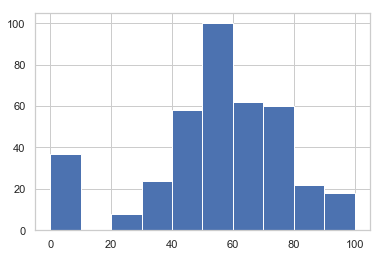

In [436]:
df.score.hist()
df['score'].describe()

In [451]:
print('Была использована 100 балльная школа оценки, выбросов нет. Большая часть оценок лежит в корзине 50-60')

Была использована 100 балльная школа оценки, выбросов нет. Большая часть оценок лежит в корзине 50-60


In [450]:
print('Значение score имеет нормальное распределение за исключением значения 0. Создам отдельный бинарный столбец, который показывает равен ли скор 0')

Значение score имеет нормальное распределение за исключением значения 0. Создам отдельный бинарный столбец, который показывает равен ли скор 0


In [439]:
df['score_0'] = df.apply(lambda x: 1 if x['score'] == 0 else 0, axis = 1)

## Корреляционный анализ

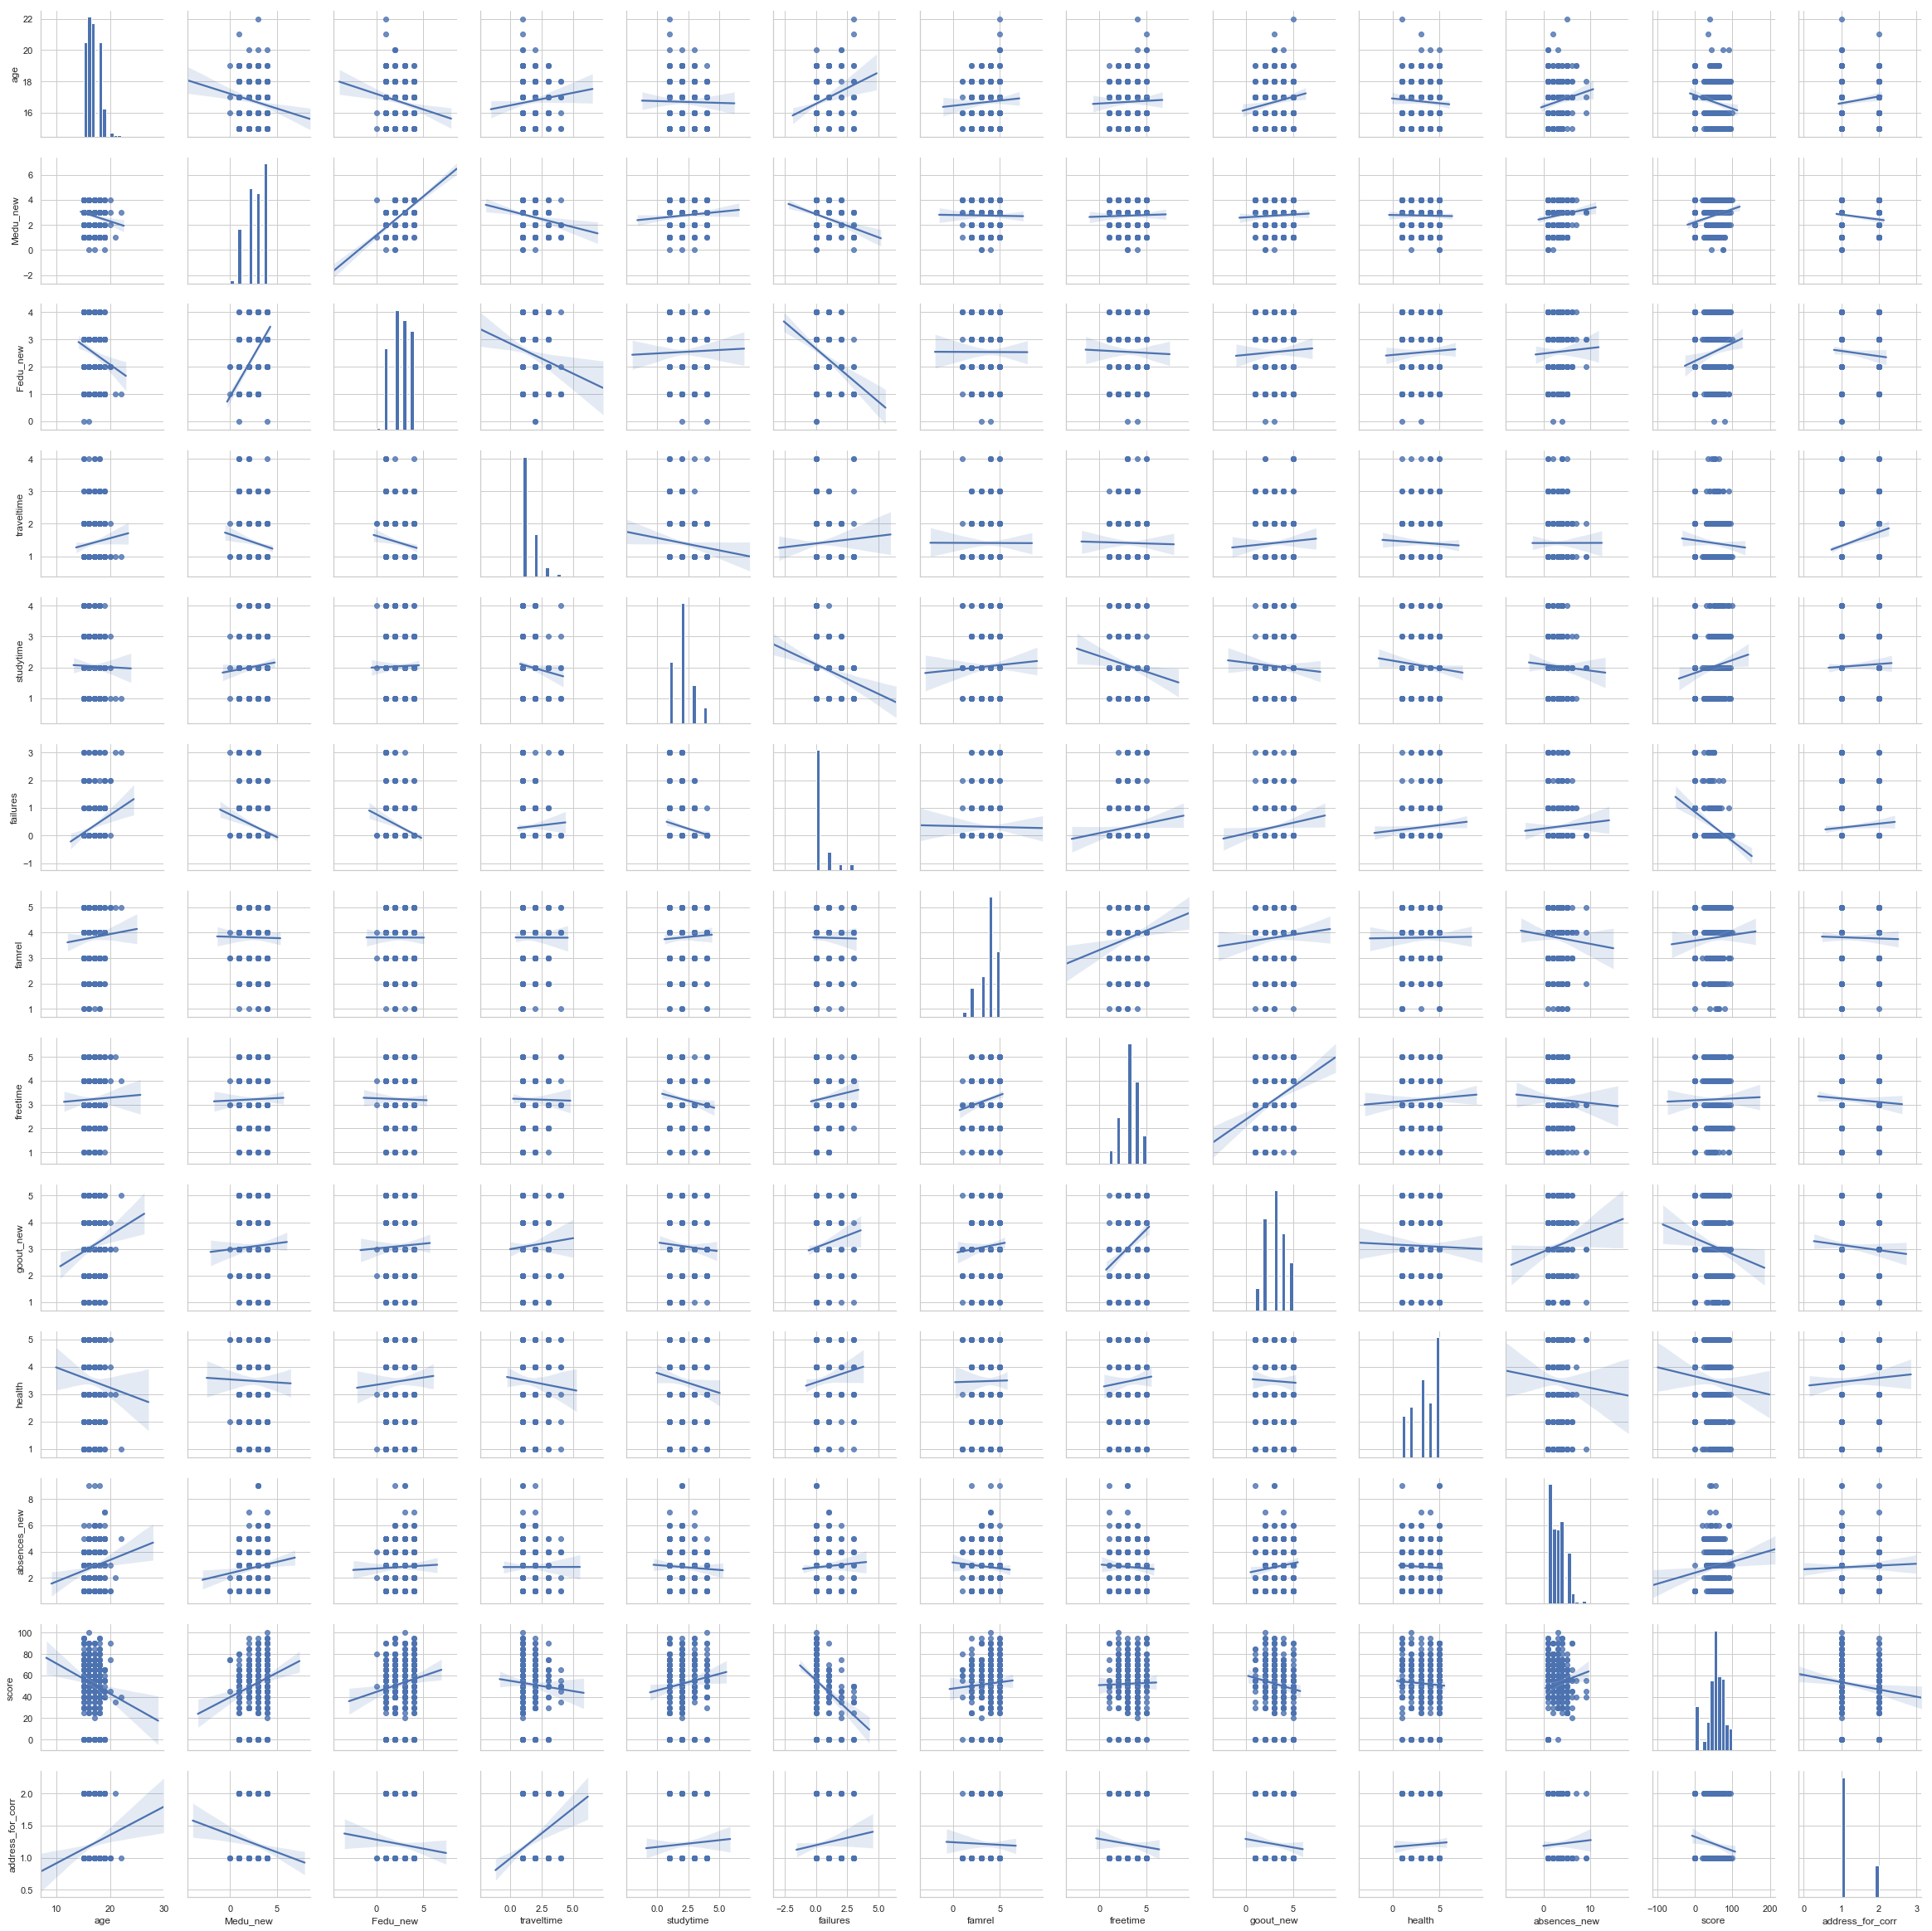

In [508]:
sns.pairplot(df, vars=['age','Medu_new','Fedu_new','traveltime', 'studytime','failures','famrel',
                        'freetime', 'goout_new', 'health', 'absences_new', 'score','address_for_corr'], kind = 'reg')

In [523]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Medu_new,Fedu_new,goout_new,score_na,score_0,schoolsup_for_corr,famsup_for_corr,paid_for_corr,activities_for_corr,nursery_for_corr,higher_for_corr,internet_for_corr,romantic_for_corr
age,1.000000,-0.161704,-0.163670,0.084755,-0.015355,0.228081,0.052092,0.026443,0.135107,-0.067034,0.157732,-0.155726,-0.162308,-0.166910,0.144108,0.143298,0.090271,-0.251811,-0.148666,-0.045138,-0.082484,-0.094359,-0.202123,-0.102582,0.152688
Medu,-0.161704,1.000000,0.625516,-0.160085,0.077994,-0.245587,-0.011040,0.025542,0.064164,-0.022051,0.099406,0.213349,1.000000,0.608382,0.046930,-0.123153,-0.120814,-0.038350,0.195467,0.191374,0.104677,0.175405,0.172251,0.195899,0.020007
Fedu,-0.163670,0.625516,1.000000,-0.133855,0.012837,-0.267978,-0.010668,-0.023584,0.042663,0.046113,0.037144,0.130923,0.626378,1.000000,0.029811,-0.080675,-0.056668,0.049758,0.185660,0.129763,0.105776,0.153164,0.178052,0.133177,0.010522
traveltime,0.084755,-0.160085,-0.133855,1.000000,-0.094637,0.049670,-0.001608,-0.012496,0.050800,-0.043334,0.002535,-0.056535,-0.157923,-0.138432,0.049940,0.047482,0.011784,0.002369,-0.001252,-0.070268,-0.003594,-0.035492,-0.074303,-0.066134,0.035890
studytime,-0.015355,0.077994,0.012837,-0.094637,1.000000,-0.166598,0.039035,-0.119014,-0.050773,-0.087097,-0.065726,0.114295,0.077180,0.019534,-0.050733,0.019175,-0.035495,0.036804,0.109775,0.165665,0.112965,0.083525,0.166378,0.044639,0.054263
failures,0.228081,-0.245587,-0.267978,0.049670,-0.166598,1.000000,-0.010739,0.094826,0.113897,0.078245,0.057864,-0.337187,-0.246006,-0.262909,0.117895,0.116607,0.217990,0.007616,-0.075523,-0.171127,-0.085189,-0.085514,-0.259995,-0.061406,0.093602
famrel,0.052092,-0.011040,-0.010668,-0.001608,0.039035,-0.010739,1.000000,0.149697,0.063599,0.008160,-0.066540,0.051949,-0.011546,-0.001313,0.063637,0.064999,-0.043237,0.005162,-0.021350,0.005986,0.055846,-0.012662,0.028314,0.053485,-0.089795
freetime,0.026443,0.025542,-0.023584,-0.012496,-0.119014,0.094826,0.149697,1.000000,0.295648,0.049656,-0.073965,0.017481,0.022521,-0.016819,0.310042,0.055962,-0.038470,-0.057742,0.015577,-0.054789,0.072705,-0.040063,-0.044922,0.093497,-0.033078
goout,0.135107,0.064164,0.042663,0.050800,-0.050773,0.113897,0.063599,0.295648,1.000000,-0.015919,0.034402,-0.129685,0.061968,0.046859,1.000000,0.091782,0.017450,-0.036617,-0.036870,0.015617,0.058704,-0.010700,-0.021323,0.105438,0.004825
health,-0.067034,-0.022051,0.046113,-0.043334,-0.087097,0.078245,0.008160,0.049656,-0.015919,1.000000,-0.010244,-0.054309,-0.017638,0.040704,-0.022577,0.017162,0.021644,-0.011577,0.048907,-0.062577,0.027822,-0.020819,0.025338,-0.080385,0.008957


In [530]:
print('Делаю дополнительные числовые столбцы для зачений да/нет')

Делаю дополнительные числовые столбцы для зачений да/нет


In [ ]:
df['schoolsup_for_corr'] = df.apply(lambda x: 1 if x['schoolsup'] == 'yes' else 0, axis = 1)
df['famsup_for_corr'] = df.apply(lambda x: 1 if x['famsup'] == 'yes' else 0, axis = 1)
df['paid_for_corr'] = df.apply(lambda x: 1 if x['paid_new'] == 'yes' else 0, axis = 1)
df['activities_for_corr'] = df.apply(lambda x: 1 if x['activities'] == 'yes' else 0, axis = 1)
df['nursery_for_corr'] = df.apply(lambda x: 1 if x['nursery'] == 'yes' else 0, axis = 1)
df['higher_for_corr'] = df.apply(lambda x: 1 if x['higher'] == 'yes' else 0, axis = 1)
df['internet_for_corr'] = df.apply(lambda x: 1 if x['internet'] == 'yes' else 0, axis = 1)
df['romantic_for_corr'] = df.apply(lambda x: 1 if x['romantic'] == 'yes' else 0, axis = 1)

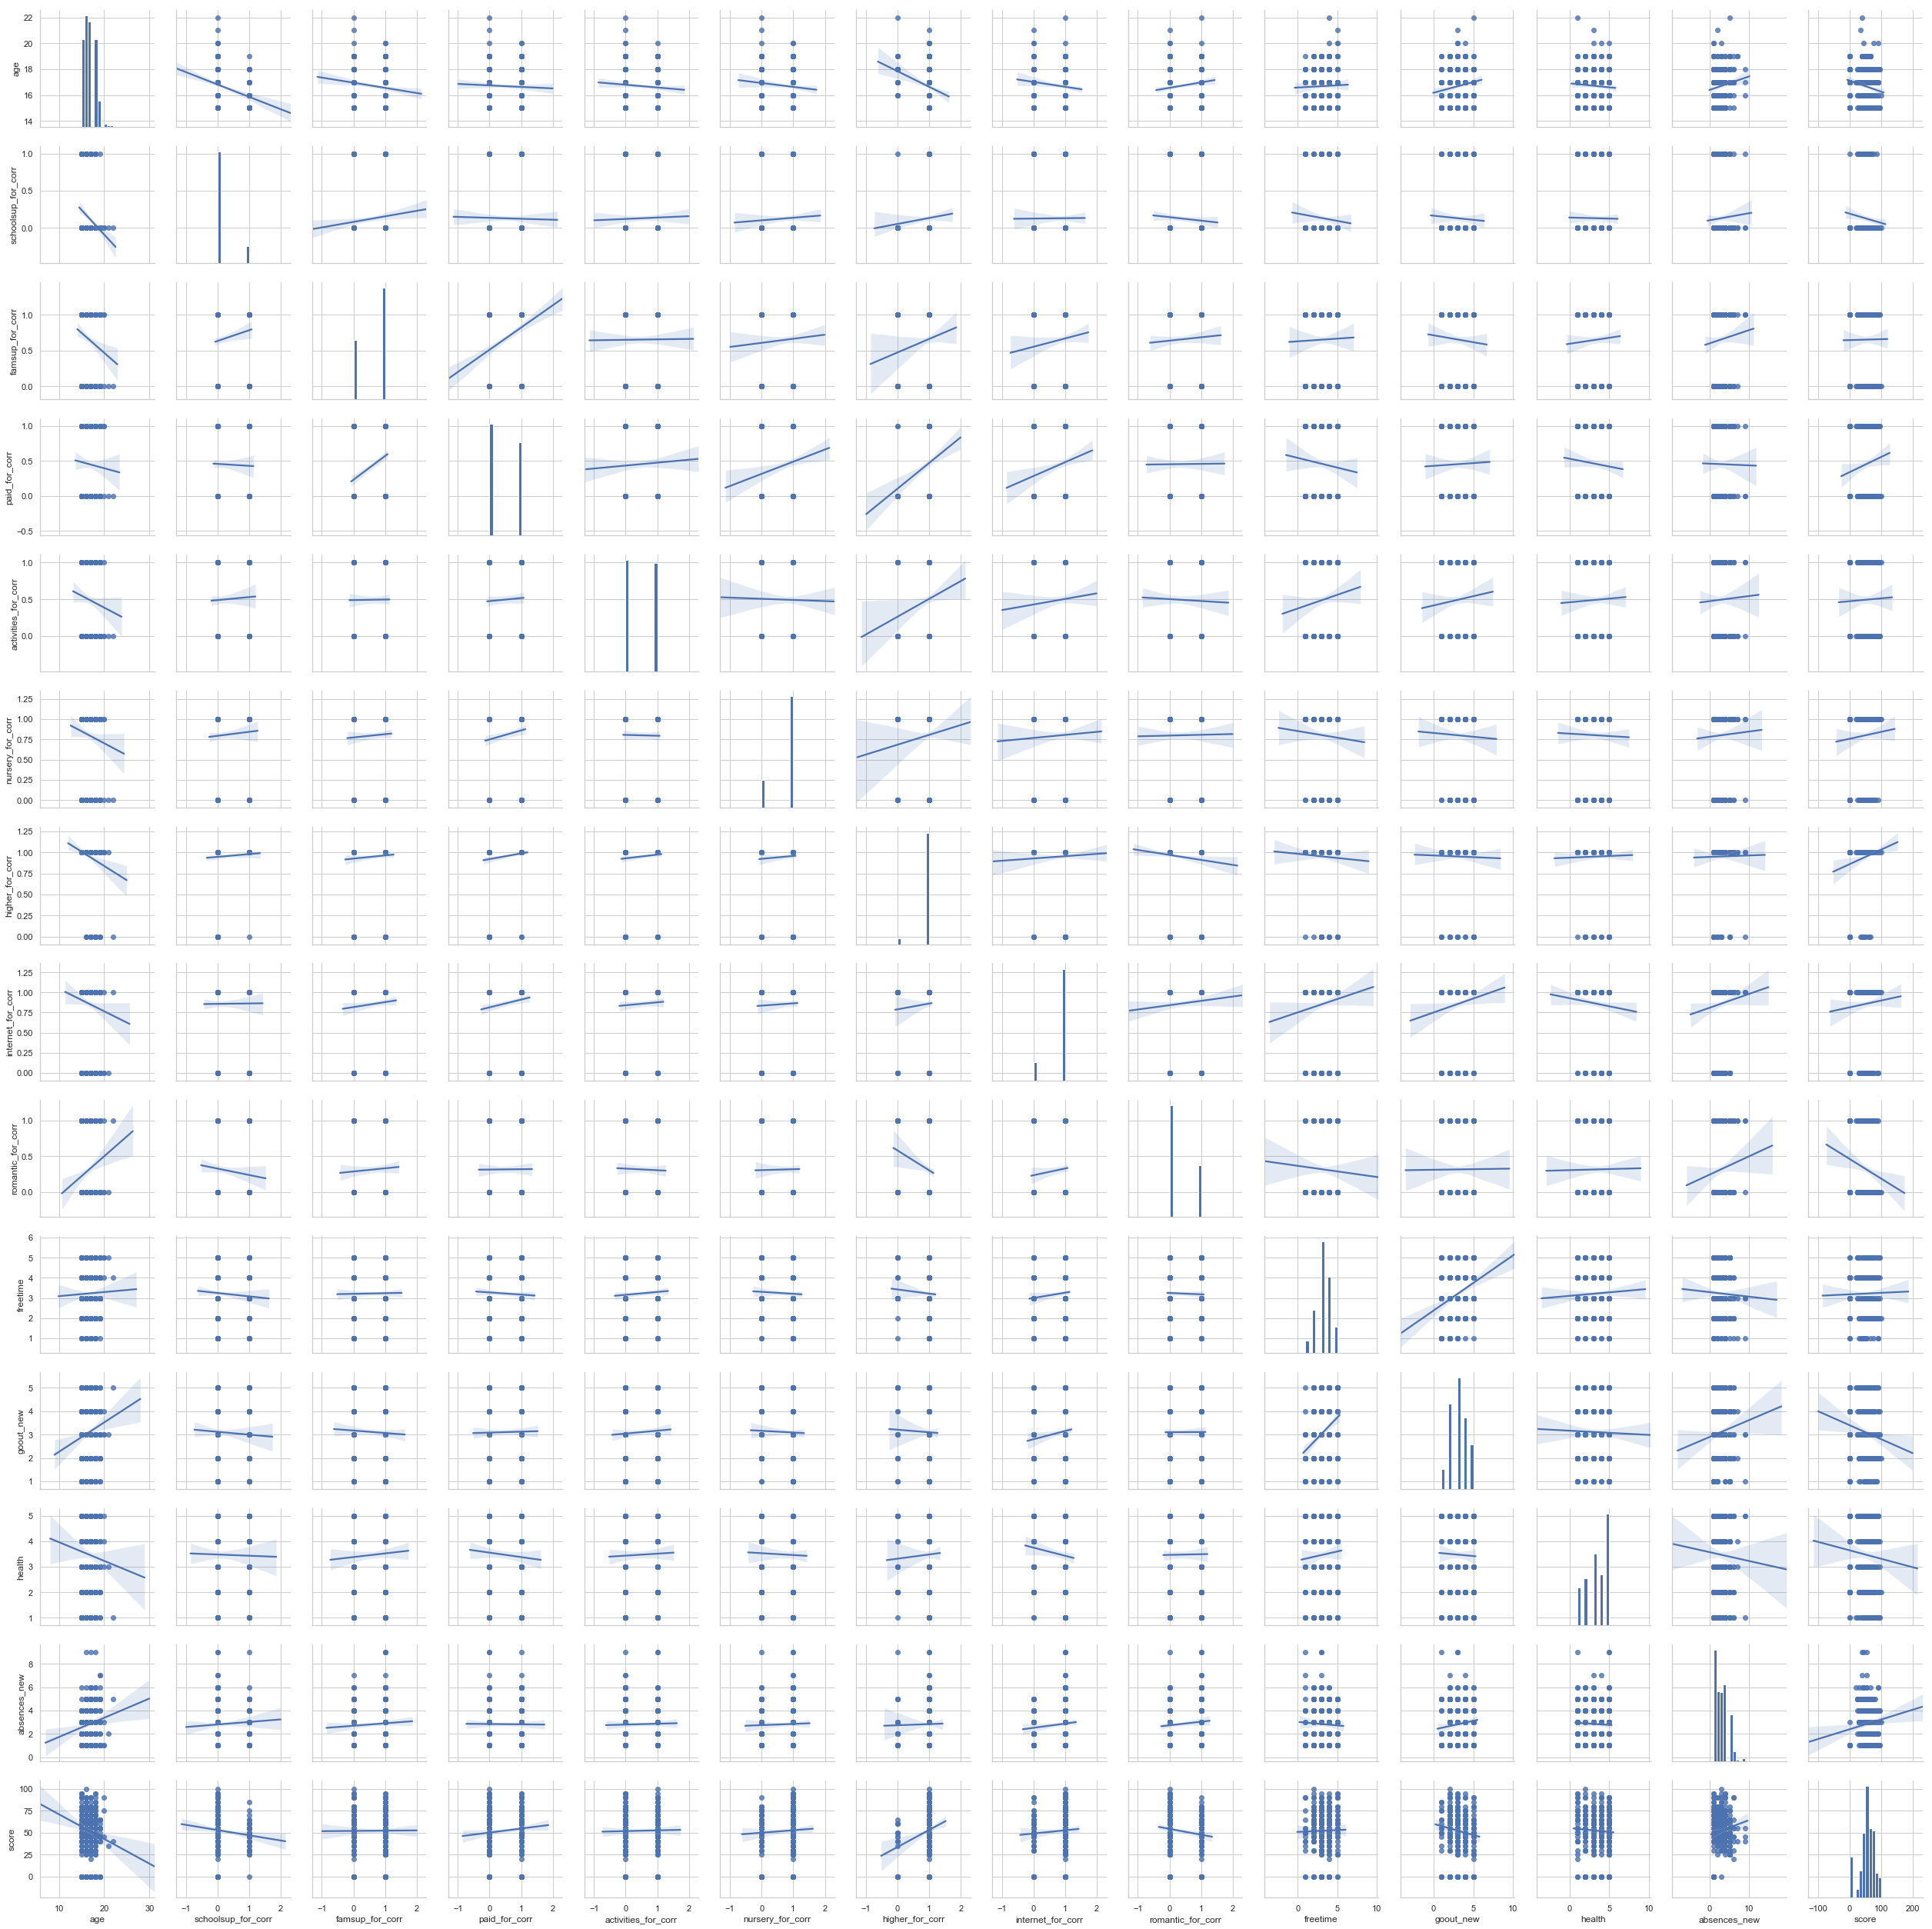

In [531]:
sns.pairplot(df, vars=['age','schoolsup_for_corr','famsup_for_corr','paid_for_corr','activities_for_corr','nursery_for_corr','higher_for_corr','internet_for_corr','romantic_for_corr',
                        'freetime', 'goout_new', 'health', 'absences_new', 'score'], kind = 'reg')

In [ ]:
Коррелируют Fedu Medu
Коррелируют goout freetime

In [462]:
df['Fedu_new'].corr(df['Medu_new'])

0.6093049450889907

In [463]:
df['score'].corr(df['failures'])

-0.33718683932978305

In [528]:
df['famsup_for_corr'].corr(df['paid_for_corr'])

0.32499662322132444

In [529]:
df['freetime'].corr(df['goout_new'])

0.3100416340913877

#### Номинативные переменные

In [468]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

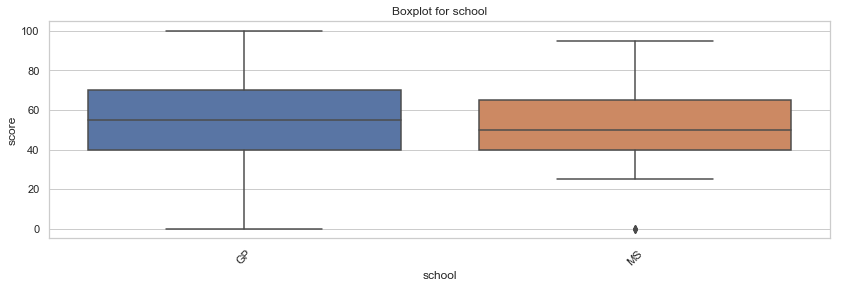

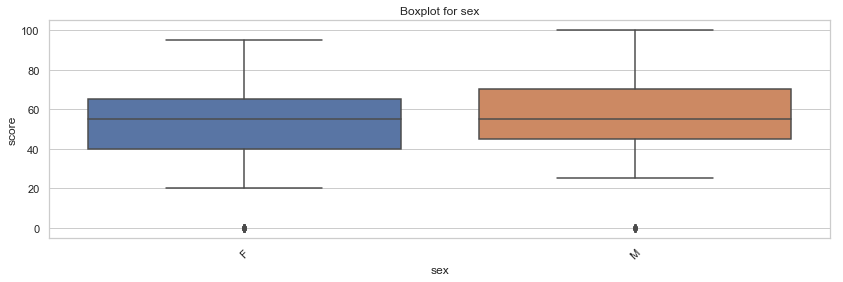

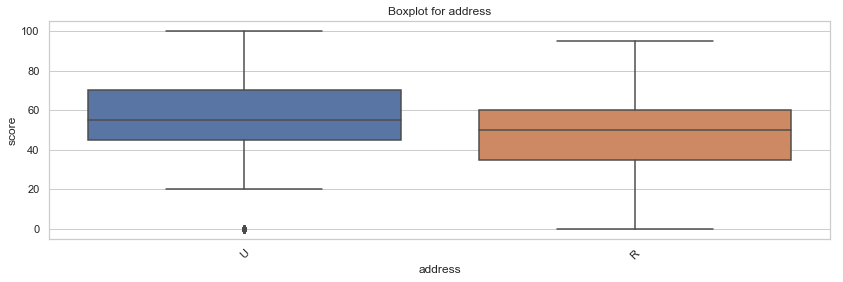

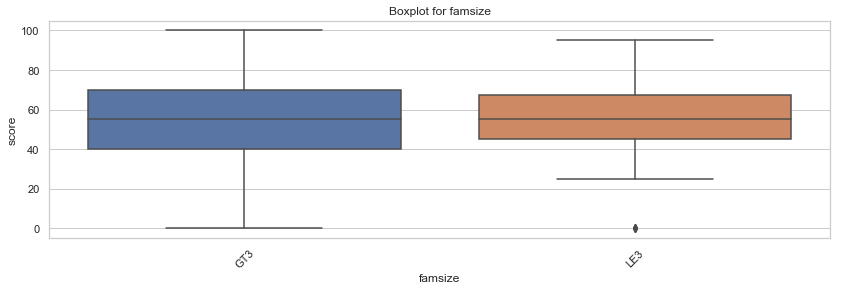

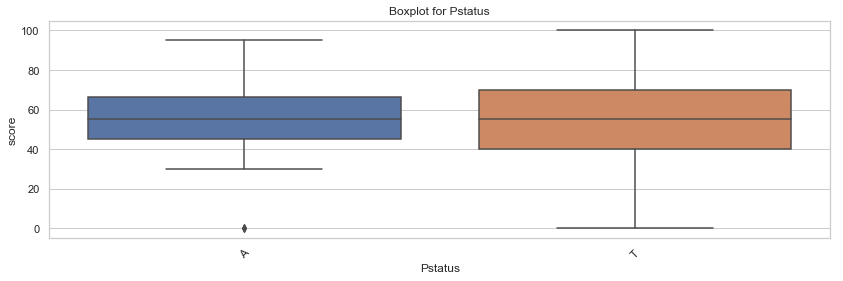

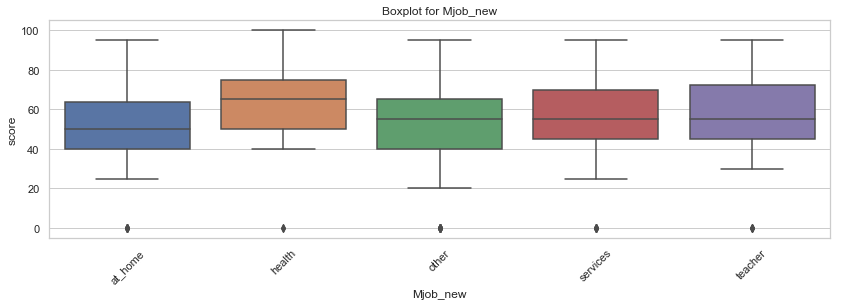

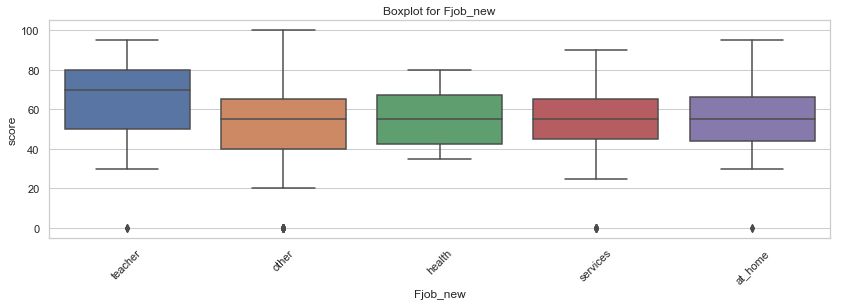

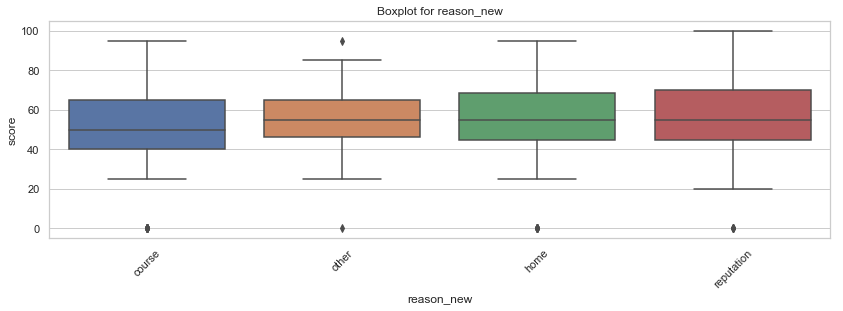

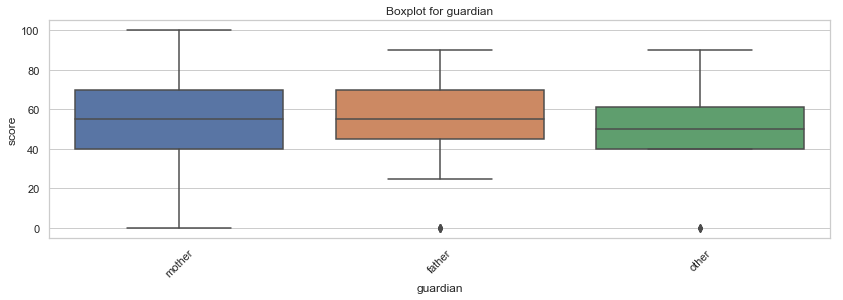

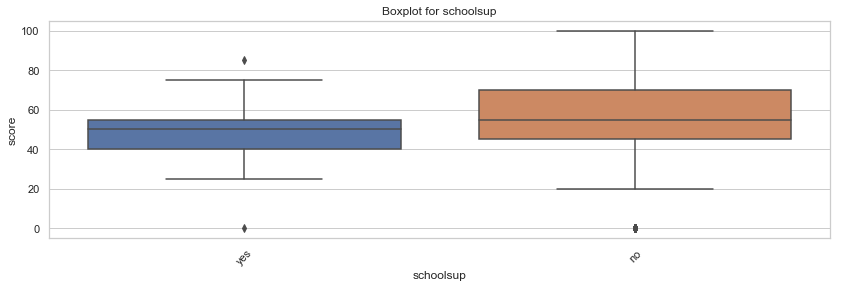

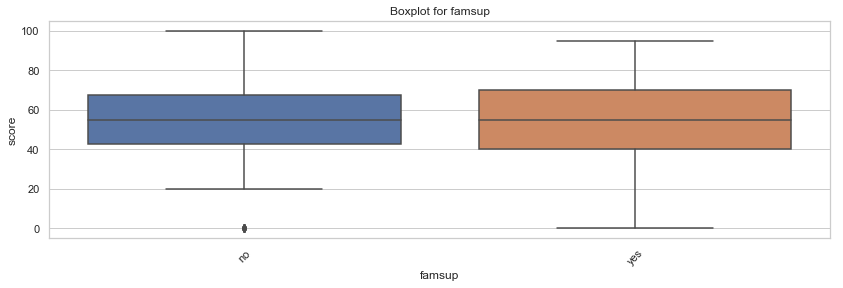

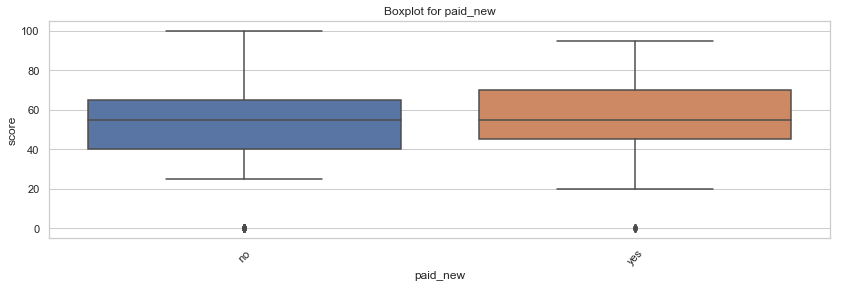

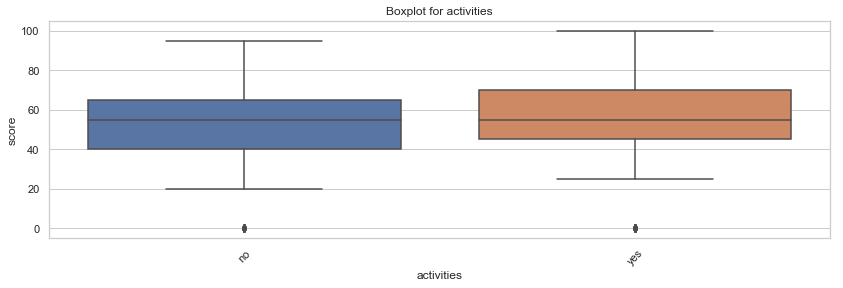

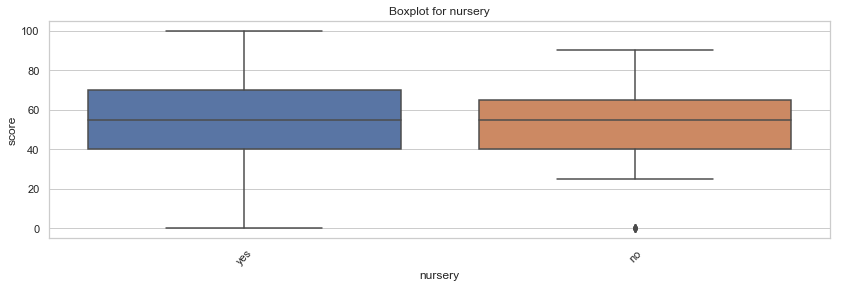

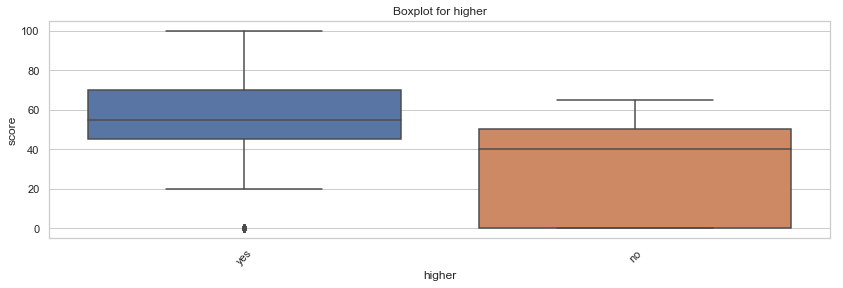

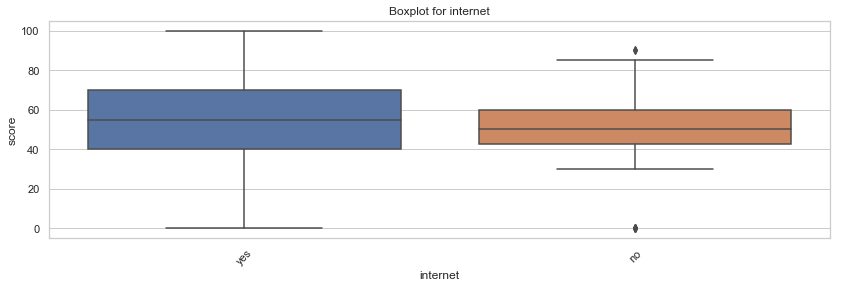

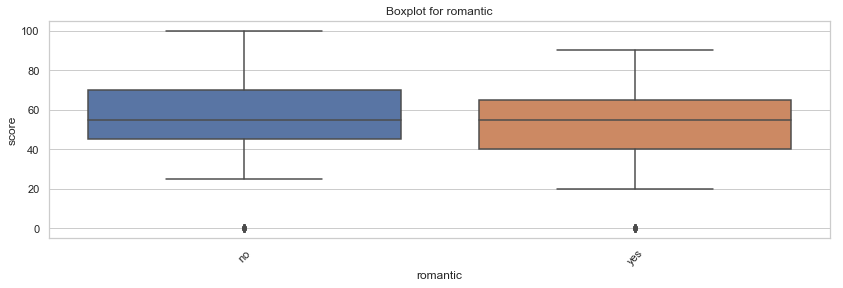

In [470]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob_new','Fjob_new','reason_new', 'guardian', 'schoolsup','famsup','paid_new','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

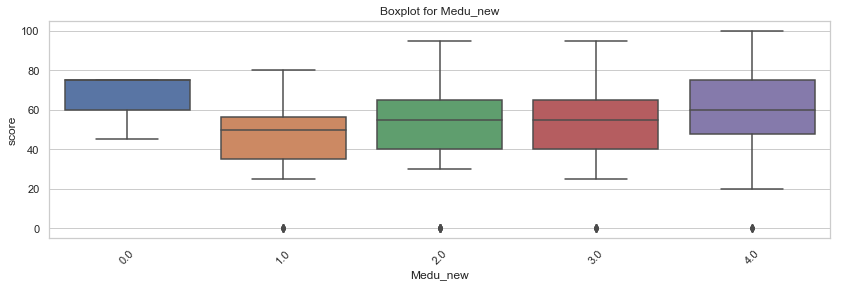

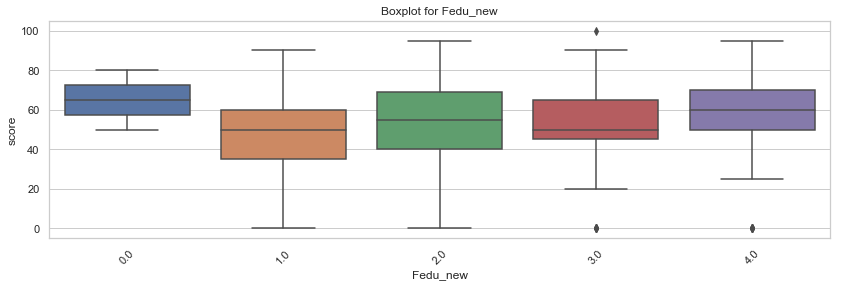

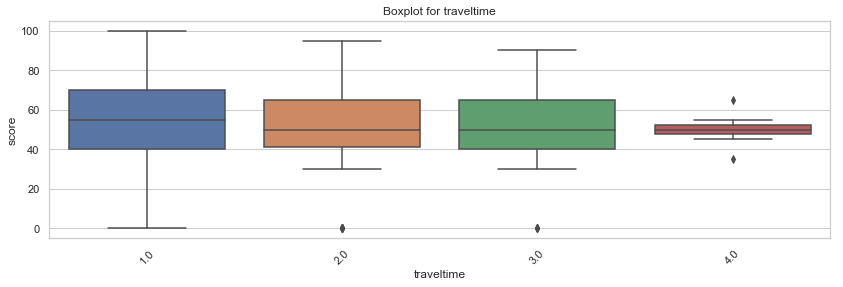

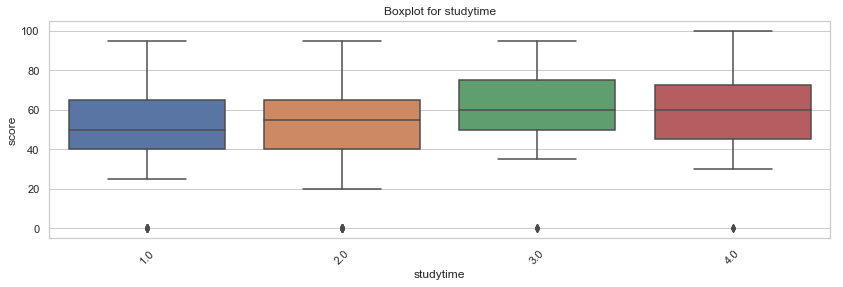

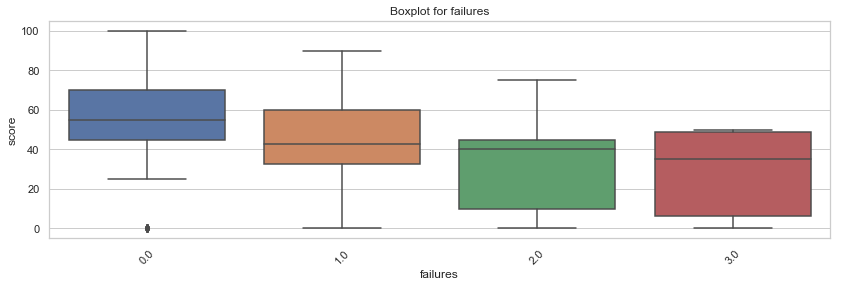

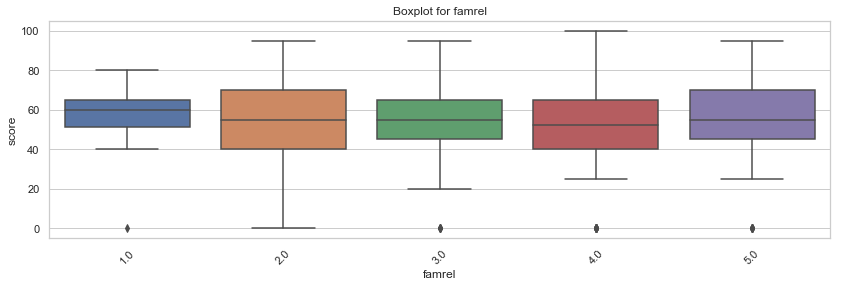

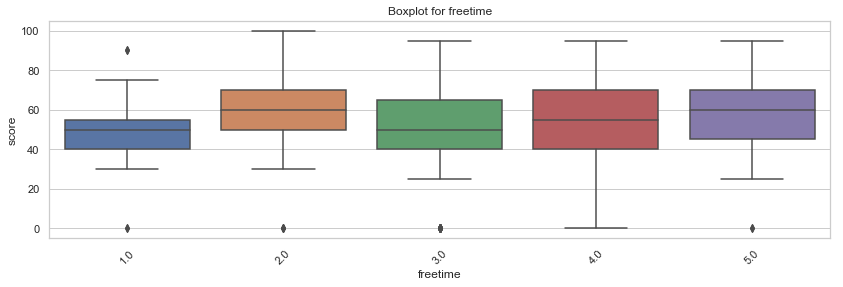

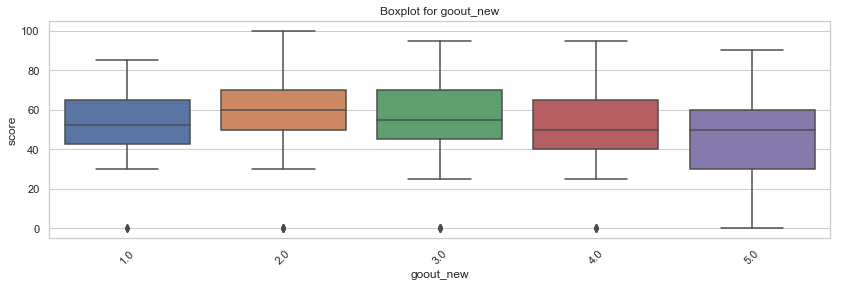

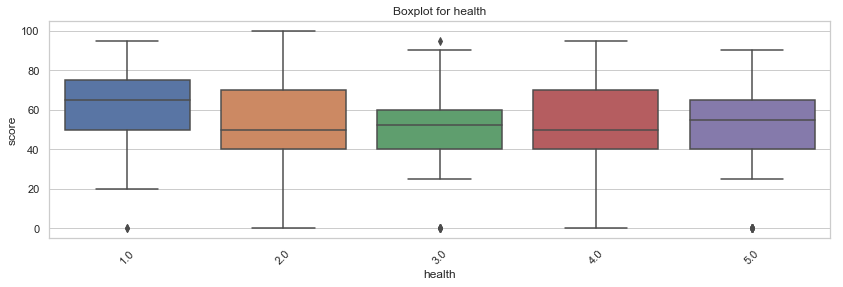

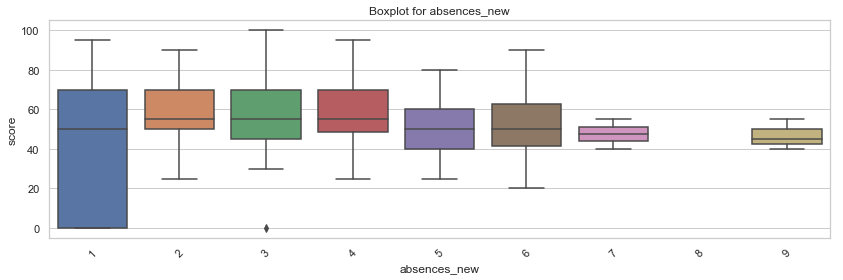

In [471]:
for col in ['Medu_new','Fedu_new','traveltime', 'studytime','failures','famrel',
                        'freetime', 'goout_new', 'health', 'absences_new']:
    get_boxplot(col)

In [513]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [535]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob_new','Fjob_new','reason_new', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob_new


In [533]:
for col in ['Medu_new','Fedu_new','traveltime', 'studytime','failures','famrel',
                        'freetime', 'goout_new', 'health', 'absences_new']:
    get_stat_dif(col)

### Выводы:

In [ ]:
Проведена работа по очистке и заполнению столбцов
Коррелияционный анализ не показал существенных взаимосвязей между переменными
Анализ номинативных переменных показал, что различия статистически значимы лишь для колонки Mjob